Début du projet : 

Problématique : Comment assurer la survie d'une population sur Mars ?

Français

On souhaite étudier le phénomène de survie d’une population humaine coloniale sur Mars, plus particulièrement, les conditions permettant la prospérité de cette dernière. On organise le problème comme suit : une population, distribuée en hommes et femmes, répartis selon des tranches d’âges variant de 0 à 90 ans. Leur survie est surveillée toutes les décennies. Ils grandissent et peuvent faire des enfants, qui grandiront et survivront de la même manière. Ils reçoivent également une certaine quantité de ressources.
On observe qu’à travers le temps, la survie est assurée pour une population dont les proportions initiales d’hommes et de femmes sont les mêmes (pour assurer une postérité, elle-même prospère) ainsi que jouissant de quantités de ressources suffisantes.





Anglais

This a survival simulation that follows the behavior of a population on Mars over time.
Our program consists in generating a set of people, of which gender and age are initially chosen. Their behavior is checked every decade, which makes them grow older. Through a probability dictionnary, they can, when coupled, give oftspring, that will behave the same way. They are provided with a ressource system that decreases death likelyhood.
Their survival is guarenteed only under specific circumstances : male and female proportions must be (at least) approximately the same (so they can make kids), and there must be the right amount of ressources.  

In [176]:
%matplotlib inline     
# ^Sans animations
# %matplotlib notebook 
# ^Avec animations
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import random 

On commence par faire des dictionnaires sur les probabilités de décès et de descendance en fonction de la décennie.

In [177]:
# Dictionnaire représentant la distribution de probabilité des descendants.
# clef = nombre de descendants et valeur = probabilité

p0 = {0 : 1.0}

p10 = {0 : 1.0}

p20 = {0 : 0.7,
     1 : 0.2,
     2 : 0.1}

p30 = {0 : 0.5,
     1 : 0.35,
     2 : 0.15}

p40 = {0 : 0.75,
     1 : 0.15,
     2 : 0.1}

p50 = {0 : 0.9,
     1 : 0.1}

p60 = {0 : 1.0}
 
p70 = {0 : 1.0}

p80 = {0 : 1.0}

p90 = {0 : 1.0}

p = {0 : p0,
    10 : p10,
    20 : p20,
    30 : p30,
    40 : p40,
    50 : p50,
    60 : p60,
    70 : p70,
    80 : p80,
    90 : p90}

In [180]:
def number_of_descendants(p, a):
    '''
    dict[int:dict[int:float]]*int->int
    Étant donnée une distibution de probabilité 'p', et un age, la fonction retourne le nombre de descendants d'un individu.
    '''
    u = np.random.random()
    s = 0
    pb = p[a]
    for k in pb.keys():
        s += pb[k]
        if u < s:
            return k
        
number_of_descendants(p, 30)

0

 On teste cette fonction pour verifier la cohérence des dictionnaires de proba.

In [181]:
def number_of_descendants_in_a_life_time(p):
    '''
    dict[int:dict[int:float]]->int
    nombre de minots sur une vie
    '''
    a = 0
    nb_de_m = 0
    while a <= 90:
        nb_de_m += number_of_descendants(p, a)
        a += 10
    return nb_de_m


number_of_descendants_in_a_life_time(p)

1

On créé le dictionnaire initial de la population

In [182]:
pop_init = {0 : 0,
    10 : 0,
    20 : 50,
    30 : 50,
    40 : 10,
    50 : 5,
    60 : 0,
    70 : 0,
    80 : 0,
    90 : 0}

Fonction qui donne le nombre total de naissances en fonction du dictionnaire de population

In [183]:
def nb_naissances(p1, p2):
    '''
    dict[int:int] * dict[int:dict[int:float]] -> int
    renvoie le nombre de naissances pendant 10 ans
    '''
    a = 0
    nv_enfant = 0
    for a in p1:
        b = p1[a]
        i = 0
        while i < b:
            nv_enfant += number_of_descendants(p2, a)
            i += 1
    return nv_enfant 

nb_naissances(pop_init,p)     

73

On met ensuite à jours le dictionnaire de population

on fait l'hypothèse qu'au dessus de 99 ans, on meurt

In [184]:
def pop_decade(pop,p):
    '''
    dict[int:int] * dict[int:dict[int:float]] -> dict[int:int]
    renvoie le dict de population apres une decade (lire avec l'accent svp)
    '''
    nv_enfant = nb_naissances(pop, p)
    pop_ev = {}
    i = 0
    while i < 90:
        pop_ev[(i + 10)] = pop[i]
        i += 10
        
    pop_ev[0] = nv_enfant
    
    return pop_ev
    

pop_decade(pop_init,p)
    

{0: 55, 10: 0, 20: 0, 30: 50, 40: 50, 50: 10, 60: 5, 70: 0, 80: 0, 90: 0}

On introduit ensuite à l'aide d'un dictionnaire les probabilités de mortalités.

In [185]:
# Dictionnaire représentant la distribution de probabilité de mourir.
# clef = age et valeur = probabilité

pmort = {0 : 0.1,
    10 : 0.02,
    20 : 0.02,
    30 : 0.05,
    40 : 0.08,
    50 : 0.09,
    60 : 0.12,
    70 : 0.15,
    80 : 0.30,
    90 : 1.0}

Puis on fait une fonction plata_o_plomo qui donne avec le dictionnaire précédent si un indivudu est mort ou pas. 

In [186]:
def plata_o_plomo(pmort, age):
    '''
    dict[int:float]*int->int
    renvoie 0 si vivant et 1 si mort
    '''
    u = np.random.random()
    if u < pmort[age]:
        return 1
    else :
        return 0
plata_o_plomo(pmort,30)

0

Puis on créé une fonction qui va nous donner le nombre de mort pour une generation (decade)

In [187]:
def mort_gen(pmort, nb_gen, age):
    '''
    dict[int:float]*int*int->int
    Renvoie le nombre de mort d'une generation 
    '''
    i = 0
    morts = 0
    while i < nb_gen:
        morts += plata_o_plomo(pmort, age)
        i += 1
    return morts

mort_gen(pmort, 50, 30)    

2

On fait ensuite passer l'ensemble des générations de la population dans la fonction pour avoir le nombre de gens en vie à la decade suivante (toujours avec l'accent svp)

In [188]:
def pop_vivante(pmort, pop):
    '''
    dict[int:float]*dict[int:int]->dict[int:int]
    Renvoie la population moins les morts
    '''
    
    pop_ev_ok = {}
    i = 0
    for i in pop :
        pop_ev_ok[i] = pop[i] - mort_gen(pmort, pop[i], i)
    return pop_ev_ok

pop_vivante(pmort, pop_init)

{0: 0, 10: 0, 20: 50, 30: 49, 40: 9, 50: 4, 60: 0, 70: 0, 80: 0, 90: 0}

On écrit ensuite la fonction finale qui nous donne après 10 ans la population (naissance puis mort).

In [189]:
def pop_next(pop, p, pmort):
    """
    dict[int:int] * dict[int:dict[int:float]] * dict[int:float] -> dict[int:int]
    renvoie la population a la génération suivante
    """
    popnext = pop_decade(pop, p)
    popnext = pop_vivante(pmort, popnext)
    
    return popnext

print("Population à la génération suivante")
pop_next(pop_init, p, pmort)

Population à la génération suivante


{0: 42, 10: 0, 20: 0, 30: 48, 40: 45, 50: 9, 60: 5, 70: 0, 80: 0, 90: 0}

On introduit ensuite une fonction pour avoir la population Pop après une nombre de decade d.

In [190]:
def pop_after_d(pop, p , pmort, d):
    """
    dict[int:int]*dict[int:dict[int:float]]*dict[int:float]*int->dict[int:int]
    Renvoie la population à la decade d
    """
    for i in range(d):
        print("Année = ", ((i + 1)*10))
        pop = pop_next(pop, p, pmort)
        pop_totale = 0
        j = 0
        while j <= 90 : 
            print("age =", j,", Population = ",pop[j])
            pop_totale = pop_totale + pop[j]
            j = j + 10
        print("Population totale = ", pop_totale)
        print(" ")
    return pop

print("Population à la decade d")
pop_after_d(pop_init, p, pmort, 20)

Population à la decade d
Année =  10
age = 0 , Population =  52
age = 10 , Population =  0
age = 20 , Population =  0
age = 30 , Population =  50
age = 40 , Population =  47
age = 50 , Population =  9
age = 60 , Population =  5
age = 70 , Population =  0
age = 80 , Population =  0
age = 90 , Population =  0
Population totale =  163
 
Année =  20
age = 0 , Population =  49
age = 10 , Population =  50
age = 20 , Population =  0
age = 30 , Population =  0
age = 40 , Population =  46
age = 50 , Population =  41
age = 60 , Population =  8
age = 70 , Population =  5
age = 80 , Population =  0
age = 90 , Population =  0
Population totale =  199
 
Année =  30
age = 0 , Population =  21
age = 10 , Population =  48
age = 20 , Population =  48
age = 30 , Population =  0
age = 40 , Population =  0
age = 50 , Population =  41
age = 60 , Population =  38
age = 70 , Population =  7
age = 80 , Population =  3
age = 90 , Population =  0
Population totale =  206
 
Année =  40
age = 0 , Population =  22


{0: 79, 10: 64, 20: 61, 30: 69, 40: 43, 50: 45, 60: 41, 70: 24, 80: 24, 90: 0}

Fonction pour savoir ou bout de combien de decade on arrive à une pop totale n

In [191]:
def nb_of_decade(pop, p , pmort, n):
    """
    dict[int:int] * dict[int:dict[int:float]] * dict[int:float] * int -> tuple[str, int,  str, int]
    Renvoie decade ou pop > n
    """
    d = 0
    pop_totale = 0
    while pop_totale < n :
        d = d + 1
        pop = pop_next(pop, p, pmort)
        j = 0
        pop_totale = 0
        while j <= 90 :
            pop_totale = pop_totale + pop[j]
            j = j + 10
    return ("Année = ", (d*10), "Population = ", pop_totale)
nb_of_decade(pop_init, p, pmort, 10000)

('Année = ', 850, 'Population = ', 10240)

On va ensuite essayer de complexifier un peu notre modèle en prenant en compte le sexe des colons.

In [192]:
#On va donc créer des dictionnaires 
pop_h = {0 : 0,
    10 : 0,
    20 : 0,
    30 : 0,
    40 : 0,
    50 : 0,
    60 : 0,
    70 : 0,
    80 : 0,
    90 : 0}


pop_f = {0 : 0,
    10 : 0,
    20 : 250,
    30 : 250,
    40 : 50,
    50 : 30,
    60 : 0,
    70 : 0,
    80 : 0,
    90 : 0}

Pop_totale = {1 : pop_h,
              2 : pop_f}


On part du principe qu'il faut un homme et une femme pour faire des enfants.

In [193]:
pop_h.get(20)

0

In [194]:
def compte_couple(Pop_totale):
    
    age_couple = dict()
    
    poph = Pop_totale[1]
    popf = Pop_totale[2]
    i = 0
    while i <= 90 :
        age_couple[i] = min(poph[i], popf[i])
        i = i + 10
    return age_couple
compte_couple(Pop_totale)
    

{0: 0, 10: 0, 20: 0, 30: 0, 40: 0, 50: 0, 60: 0, 70: 0, 80: 0, 90: 0}

In [195]:
age_couple = {0: 0, 10: 0, 20: 25, 30: 25, 40: 5, 50: 2, 60: 0, 70: 0, 80: 0, 90: 0}

On fait maintenant la fonction qui nous donne la descendance d'un couple sur une decade.

In [196]:
def nb_enfant_couple_decade(ageh, agef, p):

    u = np.random.random()
    s = 0
    pb = p[a]
    for k in pb.keys():
        s += pb[k]
        if u < s:
            return k

Nombre de naissance en fonction du nombre de couple.

In [197]:
def nb_naissances_couples(p1, p2):
    '''
    dict[int:int] * dict[int:dict[int:float]] -> int
    renvoie le nombre de naissances pendant 10 ans
    '''
    a = 0
    nv_enfant = 0
    for a in p1:
        b = p1[a]
        i = 0
        while i < b:
            nv_enfant += number_of_descendants(p2, a)
            i += 1
    return nv_enfant 

nb_naissances_couples(age_couple,p)

26

on "tri" pour savoir combien de garçons et de filles sont nés

In [198]:
def tri_naissance(nb_enfant):
    
    nb_enfant_h = 0
    nb_enfant_f = 0
    for i in range(0, nb_enfant):
        a = random.randint(1, 2)
        if a == 1:
            nb_enfant_h = nb_enfant_h + 1
        else :
            nb_enfant_f = nb_enfant_f + 1
    return {1 : nb_enfant_h, 2 : nb_enfant_f}
    
    
tri_naissance(50)

{1: 26, 2: 24}

On améliorer les anciennes fcts.

In [199]:
def pop_decade_couple(Pop_totale,p):
    '''
    dict[int:int] * dict[int:dict[int:float]] -> dict[int:dict[int:int]]
    renvoie le dict de population apres une decade (lire avec l'accent svp)
    '''
    nb_couple = compte_couple(Pop_totale)
    nv_enfant = nb_naissances_couples(nb_couple, p)
    tri = tri_naissance(nv_enfant)
    popho = Pop_totale[1]
    popfe = Pop_totale[2]
    poph_ev = dict()
    popf_ev = dict()
    i = 0
    while i < 90:
        
        poph_ev[(i + 10)] = popho[i]
        popf_ev[(i + 10)] = popfe[i]
        i += 10
        
    poph_ev[0] = tri[1]
    popf_ev[0] = tri[2]
    
    pop_ev = {1 : poph_ev, 2 : popf_ev}
    
    return pop_ev
    

pop_decade_couple(Pop_totale,p)

{1: {0: 0, 10: 0, 20: 0, 30: 0, 40: 0, 50: 0, 60: 0, 70: 0, 80: 0, 90: 0},
 2: {0: 0,
  10: 0,
  20: 0,
  30: 250,
  40: 250,
  50: 50,
  60: 30,
  70: 0,
  80: 0,
  90: 0}}

Graphique :

In [200]:
def extract(pop_dic, key=1):
    age = []
    qte = []
    
    for k, v in pop_dic[key].items():
        age.append(k)
        qte.append(v)
    
    return age, qte

print(extract(Pop_totale))
l, v = extract(Pop_totale)


([0, 80, 50, 20, 70, 40, 10, 60, 90, 30], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


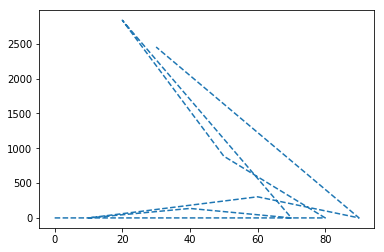

In [167]:
plt.plot(l, v, "--")

[[1140, 0, 0, 2836, 2452, 136, 886, 303, 0, 0], [1175, 1140, 0, 0, 2836, 2452, 136, 886, 303, 0], [568, 1175, 1140, 0, 0, 2836, 2452, 136, 886, 303], [358, 568, 1175, 1140, 0, 0, 2836, 2452, 136, 886], [597, 358, 568, 1175, 1140, 0, 0, 2836, 2452, 136], [665, 597, 358, 568, 1175, 1140, 0, 0, 2836, 2452], [496, 665, 597, 358, 568, 1175, 1140, 0, 0, 2836], [377, 496, 665, 597, 358, 568, 1175, 1140, 0, 0], [408, 377, 496, 665, 597, 358, 568, 1175, 1140, 0], [456, 408, 377, 496, 665, 597, 358, 568, 1175, 1140], [374, 456, 408, 377, 496, 665, 597, 358, 568, 1175], [331, 374, 456, 408, 377, 496, 665, 597, 358, 568], [315, 331, 374, 456, 408, 377, 496, 665, 597, 358], [315, 315, 331, 374, 456, 408, 377, 496, 665, 597], [312, 315, 315, 331, 374, 456, 408, 377, 496, 665]]


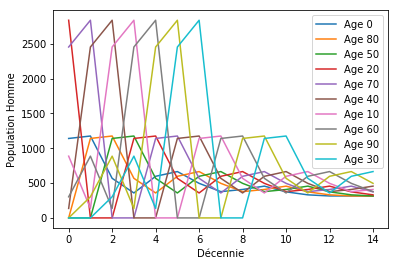

In [168]:
def liste_pop_decade_couple(Pop_totale,p, n):
    
    L2 = []
    pop_ev = Pop_totale
    for i in range (0, n):
        l2 = []
        pop_ev = pop_decade_couple(pop_ev,p)
        o = pop_ev[1]
        for u in range (0, 100, 10):
            l2.append(o[u])
            
        
        
        L2.append(l2)
        l2 = []
    print(L2)
    return L2

L2 = liste_pop_decade_couple(Pop_totale,p, 15)

def plot_2(L2):
    plt.figure()
    plt.plot(L2)
    plt.legend(["Age " + str(i) for i in p])
    plt.xlabel("Décennie")
    plt.ylabel("Population Homme")
    plt.show()
    return
plot_2(L2)



Fonction suivante :

In [169]:
#On va donc créer des dictionnaires en bal
pop_h = {0 : 0,
    10 : 0,
    20 : 2890,
    30 : 2570,
    40 : 150,
    50 : 980,
    60 : 360,
    70 : 0,
    80 : 0,
    90 : 0}


pop_f = {0 : 0,
    10 : 0,
    20 : 2500,
    30 : 2060,
    40 : 560,
    50 : 320,
    60 : 780,
    70 : 0,
    80 : 0,
    90 : 0}

Pop_totale = {1 : pop_h,
              2 : pop_f}


def pop_vivante_couple(pmort, pop1):
    '''
    dict[int:float] * dict[int:dict[int:int] -> dict[int:int]
    Renvoie la population moins les morts
    '''
    poph_n = pop1[1]
    popf_n = pop1[2]
    pop = dict()
    i = 0
    while i < 100 :
        poph_n[i] = poph_n[i] - mort_gen(pmort, poph_n[i], i)
        popf_n[i] = popf_n[i] - mort_gen(pmort, popf_n[i], i)
        i = i + 10
    
    pop = {1 : poph_n, 2 : popf_n}
    return pop

pop_vivante_couple(pmort, Pop_totale)

{1: {0: 0,
  10: 0,
  20: 2284,
  30: 1951,
  40: 113,
  50: 749,
  60: 279,
  70: 0,
  80: 0,
  90: 0},
 2: {0: 0,
  10: 0,
  20: 1921,
  30: 1575,
  40: 434,
  50: 247,
  60: 596,
  70: 0,
  80: 0,
  90: 0}}

/*--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------*/

On implémente maintenant des fonctions pour rendre la population dépendante de ressources (réalisme)

In [170]:
def ressource_terre(ini,x,n):
    """int**3->int
    retourne le taux de ressource envoyé de la terre en fonction de decade n en fonction de ini et x"""
    t=0
    while t<=n+1:    
        ini=ini+x*t
        t=t+10
    return ini

In [171]:
#taux de ressources necessaire
coefress=0.02   #coef de la fonction affine
resini=0.8#taux de ressource initial envoyé de la terre
d=10  #decade
dmax=20
rTerre=ressource_terre(resini,coefress,d)     #ressources provenant de la terre 
rPlanet=0   #ressources récolté sur place

coef=1          #coefficient

In [172]:
def impact_ressources(t,dpm):
        """float**2*dict[int:float]->dict[int:float]
        retourne le dictionnaire pmort avec l'impact des ressources"""
        j=10
        while j <= 90 : 
            dpm[j]= round(dpm[j]*t,3)
            j=j+10
        return dpm

impact_ressources(ressource_terre(resini,coefress,10),pmort)
        
        

{0: 0.1,
 10: 0.228,
 20: 0.228,
 30: 0.228,
 40: 0.228,
 50: 0.228,
 60: 0.228,
 70: 0.228,
 80: 0.228,
 90: 0.228}

In [173]:
def impact_ressources_decade(t,nmax,dpm):
    """int**3*dict[int:float]
    retourne le dictionnaire pmort avec l'impact des ressources en fonction des decades
    avec n la decade max"""
    i=0
    while i<=nmax:
        print("decade =",i)
        a = impact_ressources(ressource_terre(resini,coefress,i),pmort)
        print(a)
        i=i+1
    return
impact_ressources_decade(ressource_terre(resini,coefress,1),dmax,pmort)
impact_ressources(ressource_terre(resini,coefress,1),pmort)

decade = 0
{0: 0.1, 80: 0.182, 50: 0.182, 20: 0.182, 70: 0.182, 40: 0.182, 10: 0.182, 60: 0.182, 90: 0.182, 30: 0.182}
decade = 1
{0: 0.1, 80: 0.146, 50: 0.146, 20: 0.146, 70: 0.146, 40: 0.146, 10: 0.146, 60: 0.146, 90: 0.146, 30: 0.146}
decade = 2
{0: 0.1, 80: 0.117, 50: 0.117, 20: 0.117, 70: 0.117, 40: 0.117, 10: 0.117, 60: 0.117, 90: 0.117, 30: 0.117}
decade = 3
{0: 0.1, 80: 0.094, 50: 0.094, 20: 0.094, 70: 0.094, 40: 0.094, 10: 0.094, 60: 0.094, 90: 0.094, 30: 0.094}
decade = 4
{0: 0.1, 80: 0.075, 50: 0.075, 20: 0.075, 70: 0.075, 40: 0.075, 10: 0.075, 60: 0.075, 90: 0.075, 30: 0.075}
decade = 5
{0: 0.1, 80: 0.06, 50: 0.06, 20: 0.06, 70: 0.06, 40: 0.06, 10: 0.06, 60: 0.06, 90: 0.06, 30: 0.06}
decade = 6
{0: 0.1, 80: 0.048, 50: 0.048, 20: 0.048, 70: 0.048, 40: 0.048, 10: 0.048, 60: 0.048, 90: 0.048, 30: 0.048}
decade = 7
{0: 0.1, 80: 0.038, 50: 0.038, 20: 0.038, 70: 0.038, 40: 0.038, 10: 0.038, 60: 0.038, 90: 0.038, 30: 0.038}
decade = 8
{0: 0.1, 80: 0.03, 50: 0.03, 20: 0.03, 70: 0.0

{0: 0.1,
 10: 0.047,
 20: 0.047,
 30: 0.047,
 40: 0.047,
 50: 0.047,
 60: 0.047,
 70: 0.047,
 80: 0.047,
 90: 0.047}

Fonction finale :

In [174]:
def pop_totale_couple_fin(Pop_totale, p, pmort):
    
    Pop_totale = pop_decade_couple(Pop_totale, p)
    Pop_totale = pop_vivante_couple(pmort, Pop_totale)
    return Pop_totale


def pop_apres_n_decade(Pop_tot, p, pmort, n, ini, x):
    i = 0
    while i < n :
        Pop_tot = pop_totale_couple_fin(Pop_tot, p, pmort)
        pmort = impact_ressources(ressource_terre(ini, x, i), pmort)
        i = i+1
    
    return Pop_tot

pop_apres_n_decade(Pop_totale, p, pmort, 10, resini, coefress)

{1: {0: 220,
  10: 205,
  20: 219,
  30: 266,
  40: 335,
  50: 317,
  60: 203,
  70: 325,
  80: 658,
  90: 734},
 2: {0: 183,
  10: 211,
  20: 188,
  30: 251,
  40: 354,
  50: 313,
  60: 179,
  70: 306,
  80: 633,
  90: 648}}

On va essayer de faire deux fonctions plots différentes.

La première va nous montrer la répartition de la population en fonction de l'age et du sexe de chaque personne pour une decade donnée.

La deuxième va nous montrer l'évolution de la population totale, homme et femme depuis le début jusqu'à la décénnie donnée.

Text(0,0.5,'Population')

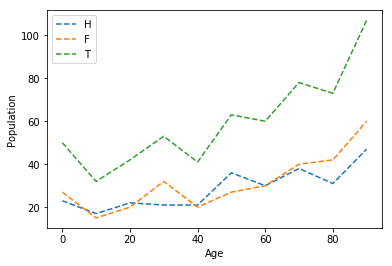

In [175]:
def list_de_pop_apres_decade(Pop_tot, p, pmort, n, ini, x):
    
    Pop_tot = pop_apres_n_decade(Pop_tot, p, pmort, n, ini, x)
    pop_homme = Pop_tot[1]
    pop_femme = Pop_tot[2]
    L_h = []
    L_f = []
    L_t = []
    i = 0
    while i < 100 :
        L_h.append(pop_homme[i])
        L_f.append(pop_femme[i])
        L_t.append(pop_homme[i] + pop_femme[i])
        i = i + 10
    
    return L_h, L_f, L_t
        
L1, L2, L3 = list_de_pop_apres_decade(Pop_totale, p, pmort, 31, resini, coefress)
v = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]    
    
plt.plot(v, L1, "--")
plt.plot(v, L2, "--")
plt.plot(v, L3, "--")
plt.legend("HFT")
plt.xlabel("Age")
plt.ylabel("Population")

Text(0,0.5,'Population')

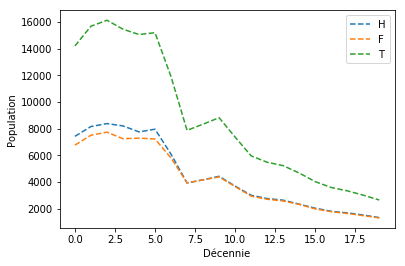

In [164]:
def list_h_f_t(Pop_tot, p, pmort, n, ini, x):
    
    L_h = []
    L_f = []
    L_t = []

    i = 0
    while i < n :
        Pop_tot = pop_totale_couple_fin(Pop_tot, p, pmort)
        pop_homme = Pop_tot[1]
        pop_femme = Pop_tot[2]
        
        
        nh = 0
        nf = 0
        nt = 0
        u = 0
        while u < 100 :
                nh = nh + pop_homme[u]
                nf = nf + pop_femme[u]
                u = u + 10
                
        nt = nh + nf
        L_h.append(nh)
        L_f.append(nf)
        L_t.append(nt)
        
        pmort = impact_ressources(ressource_terre(ini, x, i), pmort)
        i = i+1
    
    return L_h, L_f, L_t

L1, L2, L3 = list_h_f_t(Pop_totale, p, pmort, 20, resini, coefress)

plt.plot(L1, "--")
plt.plot(L2, "--")
plt.plot(L3, "--")
plt.legend("HFT")
plt.xlabel("Décennie")
plt.ylabel("Population")